## Bank Term Deposit Acceptance forecasting

Obiettivo di questo assignment è la valutazione delle competenze tecniche del candidato e la sua modalità di approccio ad un problema di Data Science. Nello specifico è richiesto di sviluppare un modello predittivo in grado di indicare se un cliente intercettato da una campagna di marketing da parte di una banca decide di sottoscrivere o meno un deposito bancario a termine (bank term deposit).

#### Dataset: ####

All'interno della cartella **data**  viene fornito il file **bank-dataset.csv** che contiene le campagne marketing telefoniche effettuate da una banca per proporre l'acquisto del prodotto bancario.
I dettagli del dataset sono forniti all'interno del file: **bank-names.txt**.
La variabile target che indica se il cliente accetta o meno la sottoscrizione del deposito bancario è contenuta nel medesimo file con field name "y".

#### Assignement: ####

Richiesta di questo assignment è la costruzione di un modello predittivo con performance soddisfacenti per il candidato dando evidenza di tutti gli step tipici che dovrebbero essere affrontati in un progetto di Data Science: dalla pulizia e preparazione del dato fino al testing delle performance del modello costruito.

Il notebook svolto dovrà essere opportunamente commentato e dovrà essere consegnato tramite condivisione di un repository github personale accessibile che ne permetta la riproduzione.

# Solution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

## Load dataset

In [2]:
df = pd.read_csv("data/bank-dataset.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261.0,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151.0,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76.0,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92.0,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198.0,1,-1,0,unknown,no


## Initial Data Analysis

In [3]:
#df['default'].replace(['yes','no'],[1,0],inplace=True)
#df['housing'].replace(['yes','no'],[1,0],inplace=True)
#df['loan'].replace(['yes','no'],[1,0],inplace=True)
df['y'].replace(['yes','no'],[1,0],inplace=True)

In [4]:
cols_num = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
cols_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [5]:
#Data cleaning
df.isna().sum()
df = df.dropna() #removing nan values
df["marital"].mask(df["marital"]=="divrcd", "divorced", inplace=True)
df["marital"].mask(df["marital"]=="S", "single", inplace=True)
df["marital"].mask(df["marital"]=="Single", "single", inplace=True)
df["marital"].mask(df["marital"]=="Singl", "single", inplace=True)

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000
mean,41.302322,1342.136987,15.863968,244.703687,2.790548,38.153176,0.543989,0.073700
std,12.250112,2992.558988,8.430994,239.946794,3.122846,97.115860,2.264378,0.261285
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,67.000000,8.000000,101.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,436.000000,16.000000,174.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1399.000000,21.000000,303.000000,3.000000,-1.000000,0.000000,0.000000
max,150.000000,102127.000000,99.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


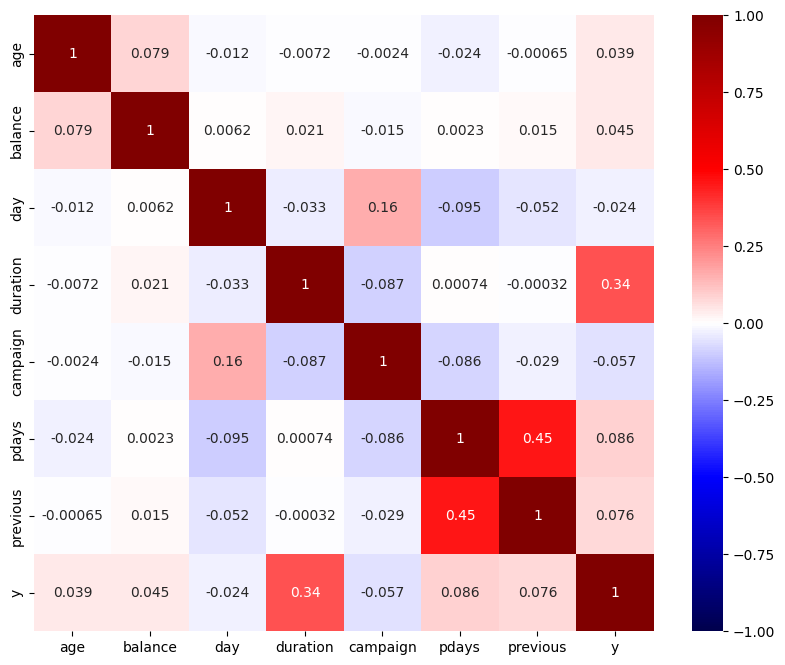

In [7]:
#Pearson Correlation
corr_mat = df[['age', 'balance', 'day', 
               'duration', 'campaign', 'pdays', 'previous', 'y']].corr()


plt.figure(figsize=(10,8))
ax = sns.heatmap(corr_mat, annot=True, vmin=-1, vmax=1, cmap='seismic')

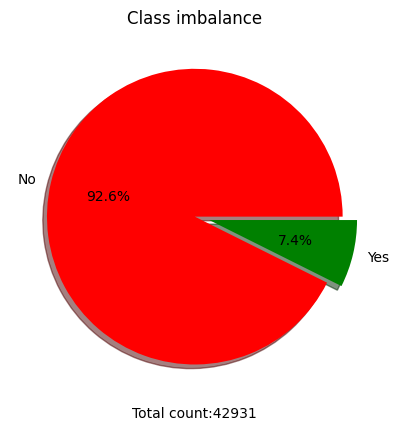

In [8]:
##Class imbalance
plt.plot()
labels = 'No', 'Yes'
plt.pie(df['y'].value_counts(),explode=[0,0.1],autopct='%1.1f%%',shadow=True,labels=labels, colors=("r","g"))
plt.title('Class imbalance')
plt.xlabel(f"Total count:{len(df)}")
plt.show()

#We have imbalance data

### Histograms

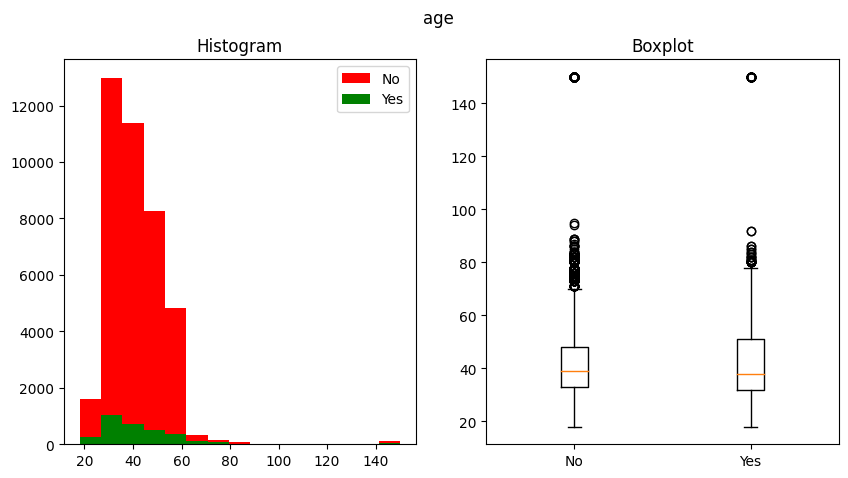

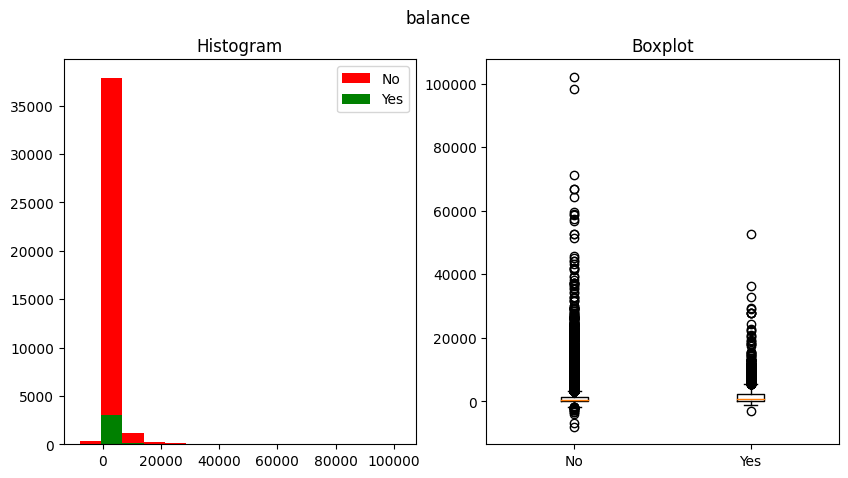

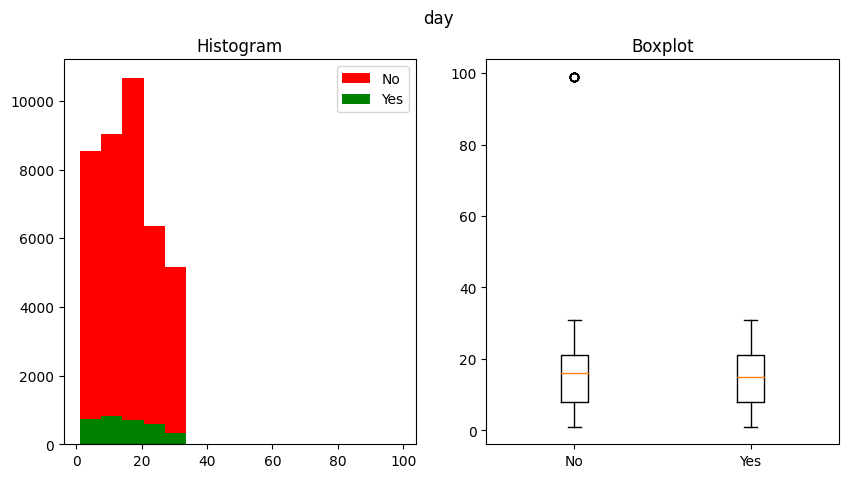

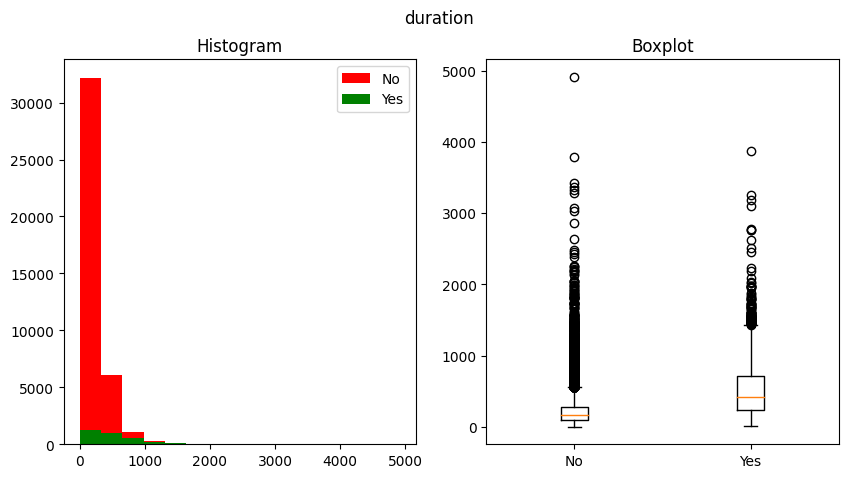

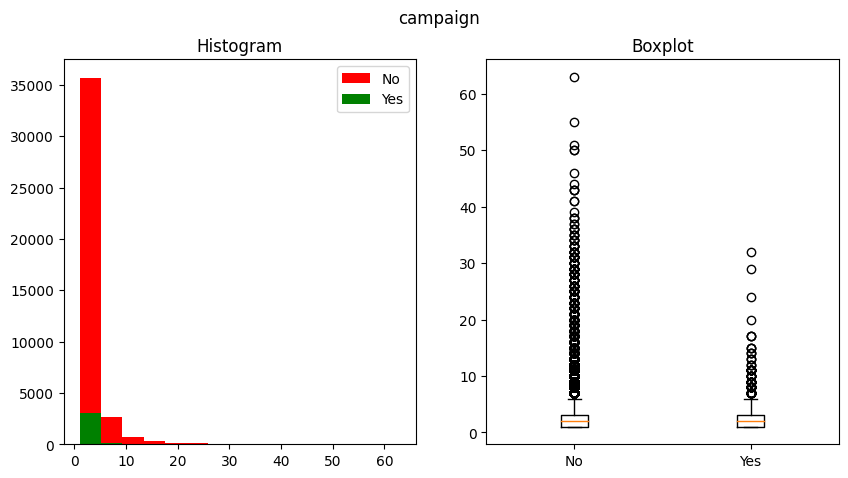

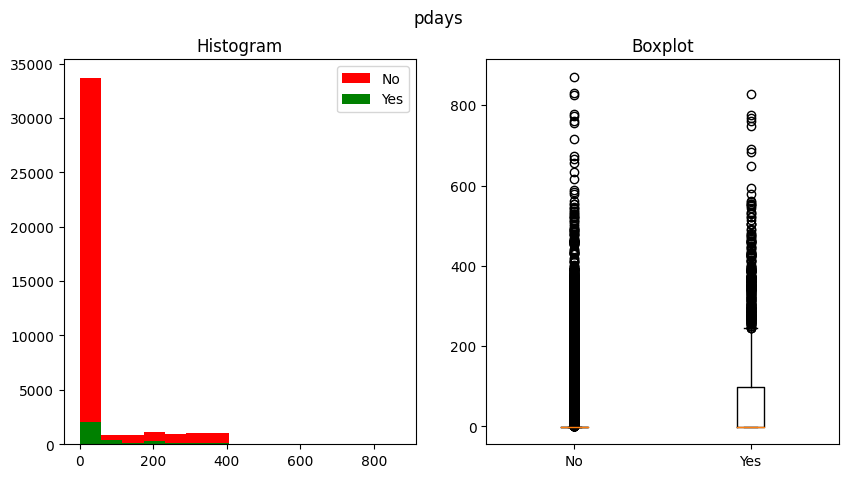

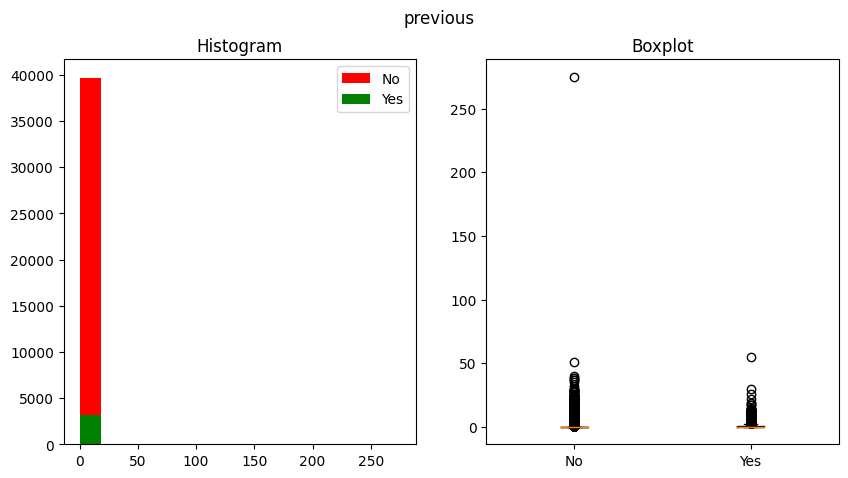

In [9]:
#histograms
for c in cols_num:
    f, axs = plt.subplots(1, 2, figsize=(10, 5))
    plt.suptitle(c)
    min_value = min(df[c])
    max_value = max(df[c])
    axs[0].hist(df[df["y"]==0][c], color="r", bins=15, range=(min_value, max_value))
    axs[0].hist(df[df["y"]==1][c], color="g", bins=15, range=(min_value, max_value))
    axs[0].legend(["No", "Yes"])
    axs[0].set_title('Histogram')
    axs[1].boxplot([df[df["y"]==0][c], df[df["y"]==1][c]])
    axs[1].set_xticks([1,2],['No', 'Yes'] )
    axs[1].set_title('Boxplot')
    plt.show()

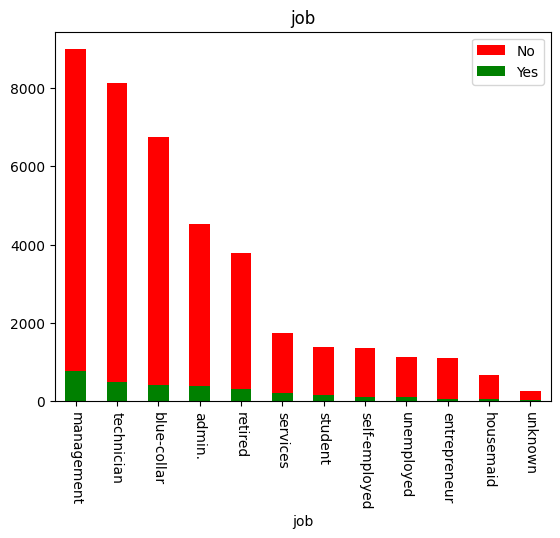

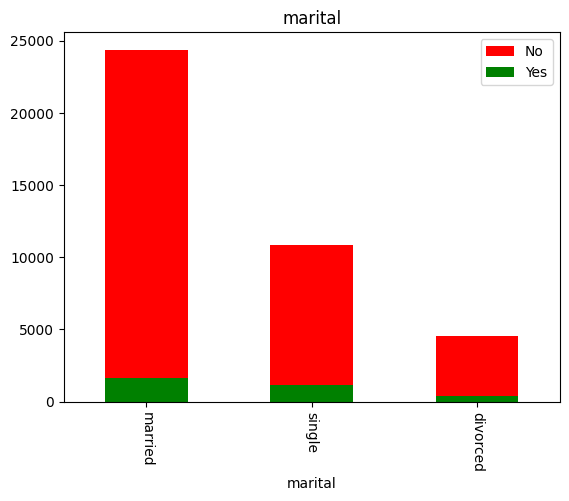

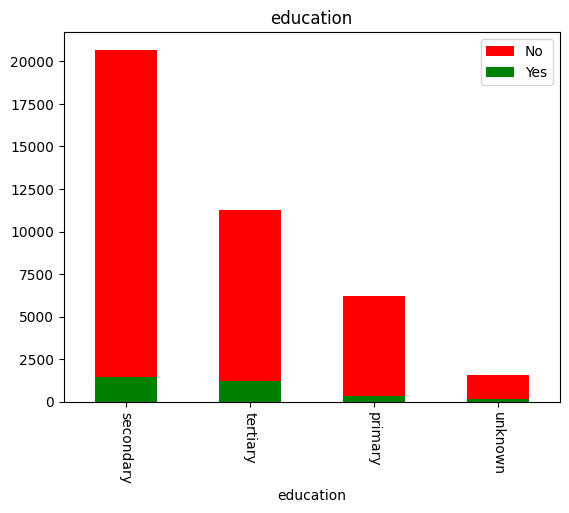

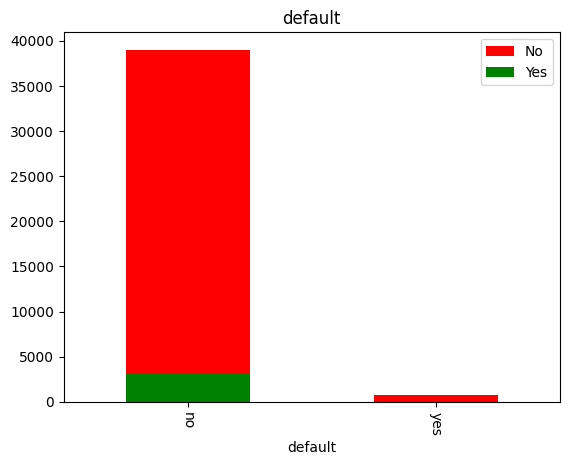

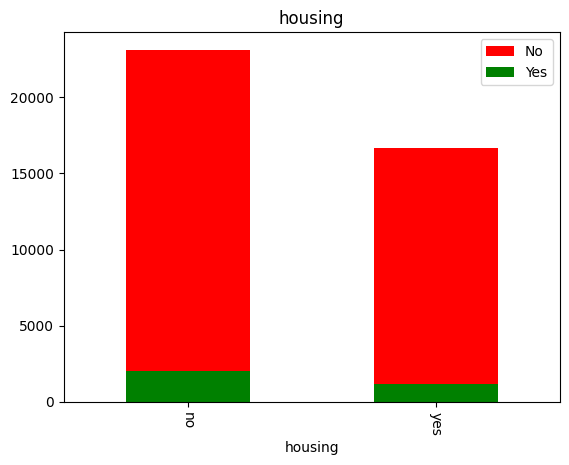

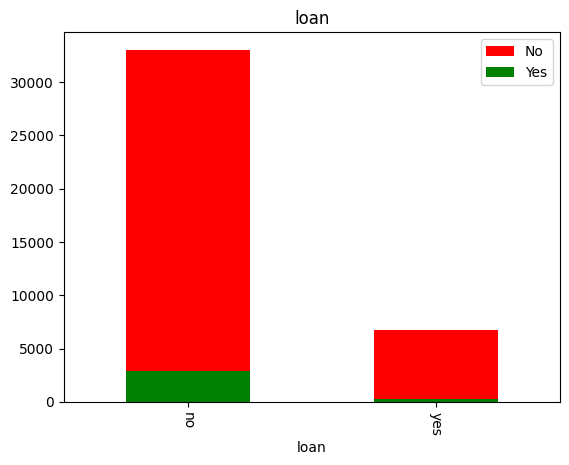

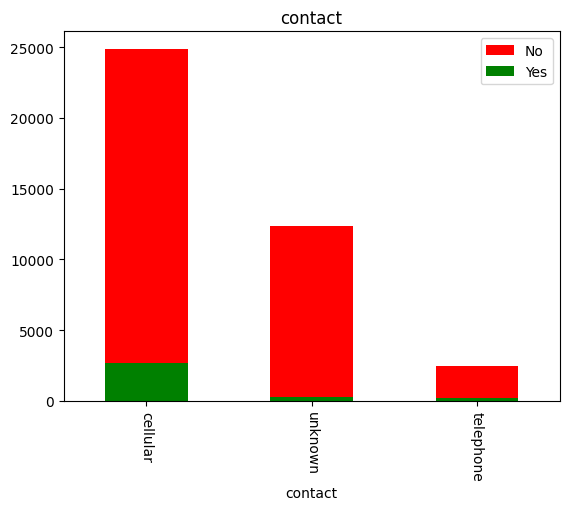

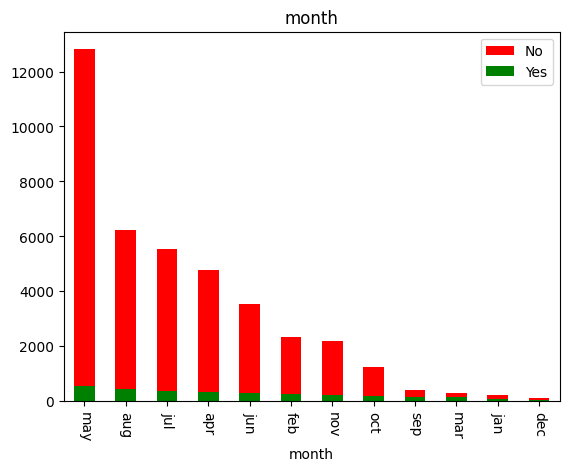

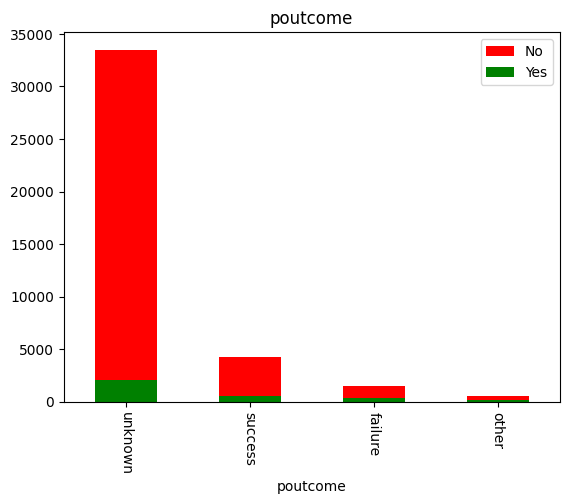

In [10]:
#histograms
for c in cols_cat:
    plt.figure()
    b = df[c].unique()
    b = np.append(b,"")
    df[df["y"]==0][c].value_counts().plot(kind='bar', color='r')
    df[df["y"]==1][c].value_counts().plot(kind='bar', color='g')
    plt.xticks(rotation=-90)
    plt.title(c)
    plt.legend(['No', 'Yes'])
    plt.show()

### Outliers

In [11]:

df = df[df["age"]<120]
df = df[df["day"]<32]
df = df[df["previous"]<60]



### One Hot - Label encoding

In [12]:
#df = pd.get_dummies(df, columns=cols_cat)  #one hot encoding
le = LabelEncoder()
for c in cols_cat:
    df[c] = le.fit_transform(df[c])

### Preprocessing

In [13]:
scaler = StandardScaler()
df[cols_num] = scaler.fit_transform(df[cols_num])

In [14]:
df_y = df['y']
rf_cols = df.columns
rf_cols = rf_cols.drop('y')
df_x = df[rf_cols]

pca = PCA(n_components=10)
df_x_pca = pd.DataFrame(data=pca.fit_transform(df_x))

In [15]:
df_x_pca

,0,1,2,3,4,5,6,7,8,9
0,-1.367436,2.247860,-0.738882,-1.664472,0.966678,-0.883370,0.073275,0.511166,0.172801,0.845790
1,3.152005,4.321553,-0.691209,-0.970852,-0.466113,-1.312527,0.323688,0.509007,0.697493,-0.009073
2,-3.231380,1.456171,-0.721310,-0.559711,-1.045669,-1.219574,0.789526,0.410039,0.628835,0.051417
3,-4.054727,1.034648,-0.720064,-0.972821,0.093681,-0.929140,0.910749,0.351019,-0.104943,1.536180
4,5.087709,5.141211,-0.653290,-0.706491,-1.343761,-0.628678,0.806950,0.581836,0.131114,1.283104
...,...,...,...,...,...,...,...,...,...,...
42755,2.913104,5.015216,-0.404788,0.245844,-1.535306,0.800560,0.033777,-0.158163,-0.736895,-0.371526
42756,2.946137,4.965785,-0.482969,-1.327679,0.273556,1.726383,-2.284767,0.458886,-1.385717,0.495494
42757,-0.787857,3.272959,-0.579368,-1.380193,2.530624,-0.324004,-1.757852,-0.446096,-1.044591,-0.583001
42758,-4.426907,1.738646,-0.823253,-0.527300,1.123240,0.199890,-1.424744,0.311417,-0.556604,0.203885


## Models

In [ ]:

from sklearn.linear_model import LogisticRegression


In [ ]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=4) #stratified because we have an imbalanced dataset

for train_idx, test_idx in cv.split(df_x, df_y):
    X_train,X_test = df_x.loc[train_idx],df_x.loc[test_idx]
    X_train_pca,X_test_pca = df_x_pca.loc[train_idx],df_x_pca.loc[test_idx]
    y_train,y_test = df_y.loc[train_idx],df_y.loc[test_idx]


